In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
# Load dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.drop('class', axis=1, inplace=True)  # Remove target column for unsupervised learning

In [3]:
# Preprocessing
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

In [5]:
# Define clustering models
clustering_algorithms = {
    'KMeans': KMeans,
    'Hierarchical': AgglomerativeClustering,
    'MeanShift': MeanShift
}

results = []
k_values = [3, 4, 5]

for method, algo in clustering_algorithms.items():
    if method == 'MeanShift':
        model = algo()
        labels = model.fit_predict(pca_data)

        silhouette = silhouette_score(pca_data, labels)
        calinski = calinski_harabasz_score(pca_data, labels)
        davies = davies_bouldin_score(pca_data, labels)

        results.append([method, None, silhouette, calinski, davies])
    else:
        for k in k_values:
            if method == 'KMeans':
                model = algo(n_clusters=k, random_state=42)
            else:
                model = algo(n_clusters=k)

            labels = model.fit_predict(pca_data)
            silhouette = silhouette_score(pca_data, labels)
            calinski = calinski_harabasz_score(pca_data, labels)
            davies = davies_bouldin_score(pca_data, labels)

            results.append([method, k, silhouette, calinski, davies])


In [6]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Method', 'Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
print(results_df)


         Method  Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0        KMeans       3.0    0.522132         179.526301        0.734652
1        KMeans       4.0    0.444415         262.855964        0.741625
2        KMeans       5.0    0.418237         276.242715        0.767693
3  Hierarchical       3.0    0.510294         283.107423        0.707180
4  Hierarchical       4.0    0.460304         253.908112        0.710474
5  Hierarchical       5.0    0.411581         254.987342        0.781780
6     MeanShift       NaN    0.613037         280.124507        0.548032


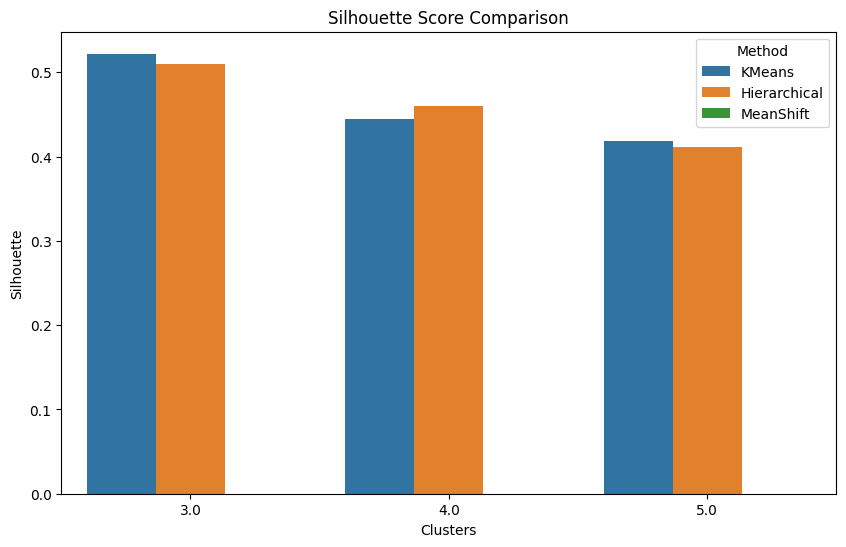

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Clusters', y='Silhouette', hue='Method')
plt.title('Silhouette Score Comparison')
plt.show()